**Prediction of Wine Quality based on its Manufacturing Ingredients**

## 1. Data Importing and Initial Exploration

In [1]:
# from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from pprint import pprint
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve,auc,average_precision_score,classification_report,roc_auc_score,log_loss
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline


In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [96]:
df = pd.read_csv('https://raw.githubusercontent.com/rjrahul24/AppliedML-Project/main/winequalityN.csv',sep = ",")
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## 2. Data Split and Preparation

In [97]:
df = df.dropna(axis=0)
df = df.replace('red', 0)
df = df.replace('white', 1)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [98]:
def quality_to_label(x):
  if x<7:
    return 'Not good'
  else:
    return 'Good'

In [99]:
X = df[['type', 'fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide', 'total sulfur dioxide', 'density','pH','sulphates','alcohol']]
y = df.quality.apply(lambda x: quality_to_label(x))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

X_dev, X_val, y_dev, y_val = train_test_split(X_train, y_train, train_size = 0.8, random_state = 42)

**PreProcessing**

In [100]:
scaler = MinMaxScaler()
# Reconstructing the dataset
feature_names=['type', 'fixed acidity',
               'volatile acidity','citric acid',
               'residual sugar','chlorides',
               'free sulfur dioxide', 'total sulfur dioxide',
               'density','pH',
               'sulphates','alcohol']
preprocess = make_column_transformer((StandardScaler(),feature_names))

## 3. Neural Network

**MLPClassifier**

In [9]:
from sklearn.neural_network import MLPClassifier

In [13]:
MLPC_pipe = Pipeline(steps=[('preprocess', preprocess), ('MLPC', MLPClassifier())])
param_grid_MLPC = {
    'MLPC__hidden_layer_sizes': [(128,), (128, 64,), (128, 64, 32,)],
    'MLPC__alpha': [0.0001, 0.0005, 0.001],
    'MLPC__learning_rate_init': [0.001, 0.005, 0.01],
    'MLPC__max_iter': [50, 100, 200]
    }
MLPC_cv = GridSearchCV(
    MLPC_pipe,
    param_grid = param_grid_MLPC,
    cv = 5,
    error_score='raise')

MLPC_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['type',
                                                                          'fixed '
                                                                          'acidity',
                                                                          'volatile '
                                                                          'acidity',
                                                                          'citric '
                                                                          'acid',
                                                                          'residual '
                                                   

In [15]:
print('Best Parameters:', MLPC_cv.best_params_)
print('Best Score:', MLPC_cv.best_score_)

Best Parameters: {'MLPC__alpha': 0.0005, 'MLPC__hidden_layer_sizes': (128, 64), 'MLPC__learning_rate_init': 0.01, 'MLPC__max_iter': 100}
Best Score: 0.8686653771760156


Evaluate model on test data.

In [101]:
y_pred_MLPC = MLPC_cv.predict(X_test)
accuracy_MLPC = np.count_nonzero(y_pred_MLPC == y_test) / y_test.shape[0]
print('Test accuracy:', accuracy_MLPC)

Test accuracy: 0.848414539829853


C:\Users\austi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


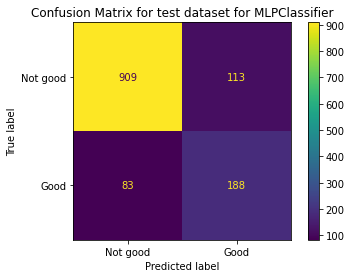

In [102]:
plot_confusion_matrix(MLPC_cv, X_test, y_test, labels=['Not good', 'Good'])  
plt.title("Confusion Matrix for test dataset for MLPClassifier")
plt.show()

In [103]:
print(classification_report(y_test, y_pred_MLPC))

              precision    recall  f1-score   support

        Good       0.62      0.69      0.66       271
    Not good       0.92      0.89      0.90      1022

    accuracy                           0.85      1293
   macro avg       0.77      0.79      0.78      1293
weighted avg       0.86      0.85      0.85      1293



**Keras Neural Network**

In [87]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.metrics import ConfusionMatrixDisplay

In [134]:
# Use best layer sizes from MLPClassifier
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(12,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [121]:
y_dev_enc = y_dev.replace('Not good', 0)
y_dev_enc = y_dev_enc.replace('Good', 1)
y_val_enc = y_val.replace('Not good', 0)
y_val_enc = y_val_enc.replace('Good', 1)
y_test_enc = y_test.replace('Not good', 0)
y_test_enc = y_test_enc.replace('Good', 1)

In [135]:
eval_hist = model.fit(X_dev, y_dev_enc, batch_size=128, epochs=15, verbose=1, validation_data=(X_val, y_val_enc))

Epoch 1/15
33/33 [==============================] - 0s 3ms/step - loss: 0.7452 - accuracy: 0.7442 - val_loss: 0.5034 - val_accuracy: 0.8162
Epoch 2/15
33/33 [==============================] - 0s 1ms/step - loss: 0.5056 - accuracy: 0.8029 - val_loss: 0.4520 - val_accuracy: 0.8162
Epoch 3/15
33/33 [==============================] - 0s 1ms/step - loss: 0.4808 - accuracy: 0.8032 - val_loss: 0.4815 - val_accuracy: 0.8162
Epoch 4/15
33/33 [==============================] - 0s 1ms/step - loss: 0.4751 - accuracy: 0.8037 - val_loss: 0.4393 - val_accuracy: 0.8162
Epoch 5/15
33/33 [==============================] - 0s 1ms/step - loss: 0.4700 - accuracy: 0.8046 - val_loss: 0.5037 - val_accuracy: 0.7950
Epoch 6/15
33/33 [==============================] - 0s 1ms/step - loss: 0.4869 - accuracy: 0.8015 - val_loss: 0.4464 - val_accuracy: 0.8172
Epoch 7/15
33/33 [==============================] - 0s 806us/step - loss: 0.4526 - accuracy: 0.8039 - val_loss: 0.4457 - val_accuracy: 0.8162
Epoch 8/15
33/33 [

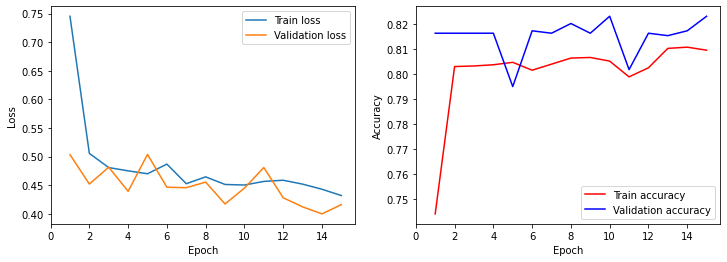

In [137]:
metrics = eval_hist.history
epoch = np.arange(1, 16)

fig, axe = plt.subplots(1, 2, figsize=(12, 4))
axe[0].plot(epoch, metrics['loss'], label='Train loss')
axe[0].plot(epoch, metrics['val_loss'], label='Validation loss')
axe[0].set_xlabel('Epoch')
axe[0].set_ylabel('Loss')
axe[0].set_xticks(range(0, 16, 2))
axe[0].legend()

axe[1].plot(epoch, metrics['accuracy'], 'r', label='Train accuracy')
axe[1].plot(epoch, metrics['val_accuracy'], 'b', label='Validation accuracy')
axe[1].set_xlabel('Epoch')
axe[1].set_ylabel('Accuracy')
axe[1].set_xticks(range(0, 16, 2))
axe[1].legend()

Evaluate model performance on test data.

In [139]:
test_scores = model.evaluate(X_test, y_test_enc, verbose=0)
print('Test loss: {:.3f}'.format(test_scores[0]))
print('Test accuracy: {:.3f}'.format(test_scores[1]))

Test loss: 0.439
Test accuracy: 0.807


Text(0.5, 1.0, 'Confusion Matrix for test dataset for Keras NN')

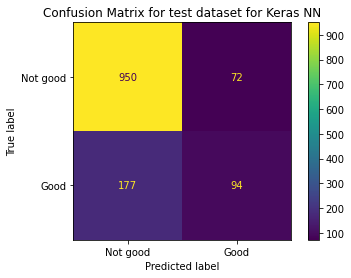

In [141]:
y_pred_NN = model.predict(X_test)
y_pred_NN[y_pred_NN < 0.5] = 0
y_pred_NN[y_pred_NN >= 0.5] = 1
cm = confusion_matrix(y_test_enc, y_pred_NN)
disp = ConfusionMatrixDisplay(cm, display_labels=['Not good', 'Good'])
disp.plot()
plt.title("Confusion Matrix for test dataset for Keras NN")

In [143]:
print(classification_report(y_test_enc, y_pred_NN))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1022
           1       0.57      0.35      0.43       271

    accuracy                           0.81      1293
   macro avg       0.70      0.64      0.66      1293
weighted avg       0.78      0.81      0.79      1293

